In [20]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

There are a set of data on coin flips (i.i.d.), named S. $ S = \{x_1, x_2, x_3, x_4, \dots\}\ $
<br>
The task here is to make a conclusion on whether this coin is biased. 

There are two hypothese regarding this set of data:<br>
<center>$H_0: |\theta - 0.5| <= \epsilon \,\, (fair \, or \, near \, fair)$<br></center>
<center>$H_1: |\theta - 0.5| > \beta\epsilon \,\, (unfair) $</center> 

And here are two contraints: <br>

1.There is a unit cost of observing one flip, $c_{x_i}$. <br>
2.There is a cost if the conclusion is wrong: <br> 

<center>For $H_0, \, L_0 = |\theta-0.5|$ <br>
<center>For $ H_1, \, L_1 = \alpha(0.5 - |\theta-0.5|)$ with $\alpha$ be a constant  <br>
(It is nice to have this $\alpha$ here since it can gives us some room to either penalize false negatives more or false positives more)



Let's say the prior for parameter $\theta$ is a beta distribution, named $\,f(\theta)$. 
<center>$f(\theta) = \frac{\theta^{(a-1)}(1-\theta)^{(b-1)}}{B(a,\,b)}$, with $a = b = 1$.


Example: 1 coin, flipped 10 times.

In [21]:
# true_theta = random.uniform(0, 1)
# n, p = 1, true_theta
# alpha = 1
# n = 10
# s = np.random.binomial(n, p, 10)
# cost_obs = 1
# s # array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [64]:
true_theta = random.uniform(0, 1)
n, p = 1, true_theta
alpha = 1
cost_obs = 0.0000000001 
def prior_func (theta, a, b):
    part_1 = (theta**(a-1))*((1-theta)**(b-1))
    part_2 = sp.special.beta(a,b)
    return part_1/part_2 
s = np.array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1])
n = 10
k = np.sum(s) #4

The logic behind this notebook follows as below:

Having observed n coin flips with k heads $(n, k)$, we want to calculate the cost of stopping and making a decisison at $(n, k)$ and the cost of preceeding and making a decision at $(n+1, k)$ or $(n+1, k+1)$. If the former is less than the later one, we stop and make an immediate decision. If the later is less than the former one, we preceed. 

In mathematical language: 

<center>$L(n, k) < c_{x_i} + \theta*L(n+1, k+1) + (1-\theta)*L(n+1, k)$ <br>



Now, take the expected value of both sides:

<center>$E(L(n, k)) < E(c_{x_i}) + E(\theta*L(n+1, k+1)) + E((1-\theta)*L(n+1, k))$ <br>
<center>$E(L(n, k)) < c_{x_i} + E(\theta)*E(L(n+1, k+1)) + E((1-\theta))*E(L(n+1, k))$ <br>


We want to evaluate the $E(\theta)$ first, which is $E(\theta)\, =\, \int_0^1\hat\theta*p(\theta = \hat\theta\,|\,k,\,n)\mathrm{d}\theta$ <br>
Given a bionomial distribution, to evaluate $\hat\theta$:<br>
<center>$p(\theta = \hat\theta\,|\,k,\,n) \,\,\, \propto \,\,\, p(\theta,\,k\,|\,n) $ <br>
<center>$p(\theta,\,k\,|\,n) \, = \, p(k\,|\,n,\,\theta)*f(\theta) \, = \, p(k\,|\,n,\,\theta)*f(\theta)$ <br>
<center>$= z_{\theta, \, k} * \binom{n}{k}\theta^k(1-\theta)^{n-k}*f(\theta)$ <br>
here, $z_{\theta, \, k}$ is a normalizing constant with $\frac{1}{\int_0^1 \binom{n}{k}\theta^k(1-\theta)^{n-k}  \mathrm{d}\theta\mathrm{d}k}$

But we know the value of k, in this case, let it be $k_0$, $k = k_0$
As such, 
<center>$p(\theta = \hat\theta\,|\,k,\,n) \,\,\, = \,\,\, p(\theta\,|\,k_0,\,n) $ <br>
<center>$= z_{\theta} * \binom{n}{k}\theta^k(1-\theta)^{n-k}*f(\theta)$ <br>
with $z_{\theta}$, a normalizing constant with $\frac{1}{\int_0^1 \binom{n}{k}\theta^k(1-\theta)^{n-k}  \mathrm{d}\theta}$<br>

Therefore, $E(\theta)\, =\, z_{\theta}\int_0^1\hat\theta*\binom{n}{k}\hat\theta^k(1-\hat\theta)^{n-k}*f(\hat\theta) \mathrm{d}\hat\theta$ <br>

Plug the above in Wolfram Alpha with n =10, k = 4, we have
$\int_0^1\hat\theta*\binom{n}{k}\hat\theta^k(1-\hat\theta)^{n-k}*f(\theta) \mathrm{d}\theta$ = $\frac {5}{572}$ <br>
With $z_\theta$ = 11,
we have 
$E(\theta)\, =\, z_{\theta}\int_0^1\hat\theta*\binom{n}{k}\hat\theta^k(1-\hat\theta)^{n-k}*f(\theta) \mathrm{d}\theta = 11*\frac {5}{572} = 0.096$ <br>

In [65]:
theta_function_simplified = lambda theta: theta**(k+2)*(1-theta)**(n-k+1)
theta_function_general = lambda theta: (theta**k)*(1- theta)**(n-k)
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)
    
def nCk(n, k):
    ret = 0
    if n == k:
        return 1
    elif k == 1:
        ret = n
    else:
        a = factorial(n)
        b = factorial(k)
        c = factorial(n - k)
    return a // (b * c)
    
def trapezoidal_rule(f, a, b, t):
    """Approximates the definite integral of f from a to b by
    the composite trapezoidal rule, using t subintervals"""
    h = (b - a) / t
    s = f(a) + f(b)
    for i in np.arange(1, t):
        s += 2 * f(a + i * h)
    return s * h / 2

def expectedTheta_constant_normalizing_factors(n, k):
    return 1/(factorial(n-k)*factorial(k)/factorial(n+1))

def expected_value_theta(n, k, f, a, b, t):
    return expectedTheta_constant_normalizing_factors(n, k) * trapezoidal_rule(theta_function_simplified, 0, 1, 100)
expected_value_theta(n, k, theta_function_simplified, 0, 1, 100)

0.096153846153840442

Now, take a look at the loss function:

For $H_0$, <br>
<center>$\, L_0 = |\theta-0.5|$ <br>

For  $H_1$,<br> 
<center>$\, L_1 = \alpha(0.5 - |\theta-0.5|)$ with $\alpha$ be a constant  <br>

These two look like:

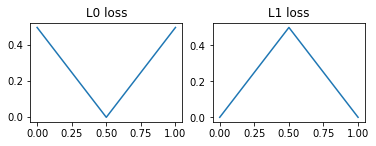

In [83]:
epsilon = 0.001
def L1(value, n, epsilon):
    if value-n < 0:
        return n-value-epsilon
    else:
        return value-n-epsilon
alpha = 1
def L2(value, n, epsilon, alpha = 1):
    if value - n <0:
        return alpha*value
    else:
        return alpha*(1-value)
fig = plt.figure()

ax1 = fig.add_subplot(221)    
x = np.arange(0, 1.1, 0.1)
L1_y = []
for i in range(len(x)):
    L1_y.append(L1(x[i], 0.5, epsilon))
ax1.plot(x, L1_y, '-')
ax1.set_title('L0 loss')

ax2 = fig.add_subplot(222) 
L2_y = []
for i in range(len(x)):
    L2_y.append(L2(x[i], 0.5, epsilon, alpha = 1))
ax2.plot(x, L2_y, '-')
ax2.set_title('L1 loss')
plt.show()

Now, we want to figure out $E(L(n+1, k+1)),\, E(L(n+1, k)),\, and \, E(L(n, k)$<br>
Starting from $E(L(n, k))$,<br>
<center>$E(L(n, k)) = min(E(L_0|n, k), E(L_1|n, k))$ <br>

With $E(L_0|(n, k))$:<br>
<center>$E(L_0|(n, k))$ 
$= E [\begin{cases} 
      0 & |\theta - 0.5|\le \epsilon \\
      |0.5-\theta| & else \\
   \end{cases}]$<br>
$ = \int_0^1L_0(\hat\theta)*p(\theta = \hat\theta\,|\,k,\,n)\mathrm{d}\theta$ <br>
$ = \int_0^{0.5-\epsilon}L_0(\hat\theta)*p(\theta = \hat\theta\,|\,k,\,n)\mathrm{d}\theta + \int_{0.5+\epsilon}^1L_0(\hat\theta)*p(\theta = \hat\theta\,|\,k,\,n)\mathrm{d}\theta$ <br>

With $E(L_1|(n, k))$:<br>
<center>$E(L_1|(n, k))$ 
$= E [\begin{cases}
      \alpha(0.5 - |0.5-\theta|) & |\theta - 0.5|\le \epsilon  \\
      0 & else \\
   \end{cases}]$<br>
$ = \int_0^1L_1(\hat\theta)*p(\theta = \hat\theta\,|\,k,\,n)\mathrm{d}\theta$ <br>
$ = \int_{0.5-\epsilon}^{0.5+\epsilon}L_1(\hat\theta)*p(\theta = \hat\theta\,|\,k,\,n)\mathrm{d}\theta$  <br>

The same calculation goes for $E(L(n+1, k+1))$ and $E(L(n+1, k))$


Going back to where we started, we have derived:

1. the cost of stopping and making a decisison at $(n, k)$
2. the cost of preceeding and making a decision at $(n+1, k)$ or $(n+1, k+1)$

To prove the fact that we can just do a one-step-look-ahead needs to prove the convexity of our loss function.
Let's say there is a function $f(x)$. Take two arbitrary points $x_0$ and $x_1$ that satisfy $x_0$ < $x_1$. If the fucntion satisfy <center>$f(\lambda x_0 + (1- \lambda)x_1) \leq \lambda f(x_0)+ (1-\lambda)f(x_1), \,$ given  that $\, \lambda \in [0, 1]$<br>

the function $f(x)$ is convex

In this case, observe $x_i$ and $x_{i+2}$. Each the observation has loss function. For simplicity, denote it as $Obs(x_i)$ and $Obs(x_{i+2})$
We want to prove
<center> $Obs(x_{i+1}) < \frac{1}{2}(Obs(x_i) + Obs(x_{i+2}))$ <br>

We have: 
<img src="Tree.png" alt="Alt text that describes the graphic" title="Title text" />


<center>$Obs(x_i) = L(n, k) = min(E(L_0|n,k)),E(L_1|n,k))$ 
<center>$Obs(x_{i+1}) = c_{x_i} + \theta*L(n+1, k+1) + (1-\theta)*L(n+1, k)$ 
<center>$Obs(x_{i+2}) = L(n, k)$ 

In [79]:
loss_1_first_half = lambda theta: abs(0.5-theta)*(theta**k)*(1- theta)**(n-k)
loss_2 = lambda theta: alpha*(0.5 - abs(0.5- theta))*(theta**k)*(1- theta)**(n-k)
range_a = 0.5+epsilon
range_b = 0.5-epsilon
def expectedloss_constant_normalizing_factor(n, k):
    return factorial(n+1)/(factorial(k)*factorial(n-k))
def mini(l_1, l_2, n, k):
    m = expectedloss_constant_normalizing_factor(n, k)*trapezoidal_rule(l_1, range_a, 1, 100) + 0
    n = expectedloss_constant_normalizing_factor(n, k)*trapezoidal_rule(l_2, range_b, range_a, 100)
    return min(m, n)


In [114]:
def cost_immediate_decsion (n, k, l_1, l_2):
    return mini(l_1, l_2, n, k)

def cost_observe_one_more (n, k, l_1, l_2):
    head = expected_value_theta(n, k, theta_function_simplified, 0, 1, 100) * mini(l_1, l_2, n+1, k+1)
    tail = (1-expected_value_theta(n, k, theta_function_simplified, 0, 1, 100)) * mini(l_1, l_2, n+1, k)
    total_cost = cost_obs + head + tail
    return total_cost

cost_observe_one_more(n, k, loss_1_first_half, loss_2)
cost_immediate_decsion(n, k, loss_1_first_half, loss_2)


1.0741119726883924e-06

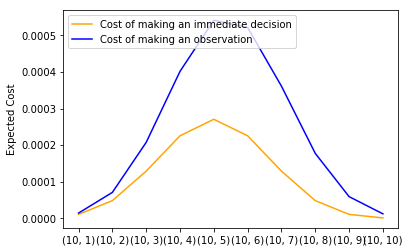

In [122]:
n = 10
heads = np.arange(1, 11)
immediate_decision = []
observe = []
for k in heads:
    immediate_decision.append(cost_immediate_decsion (n, k, loss_1_first_half, loss_2))
    observe.append(cost_observe_one_more(n, k, loss_1_first_half, loss_2))
labels = [(10, k) for k in heads]
plt.plot(heads, immediate_decision, 'orange', label = 'Cost of making an immediate decision')
plt.plot(heads, observe, 'blue', label = 'Cost of making an observation') 
ax = plt.gca() # grab the current axis
ax.set_xticks(heads) # choose which x locations to have ticks
ax.set_xticklabels(labels) # set the labels to display at those ticks
plt.legend(loc='upper left')
plt.margins(0.05)
plt.ylabel('Expected Cost')
plt.show()
#plt.label('Cost of observing one more at (10, %i) times'%)

To simulate an entire series of 10 flips

In [128]:
#true_theta = random.uniform(0, 1)
#n, p = 1, true_theta
alpha = 1
#flips = np.random.binomial(n, p, 10)
cost_obs = 0.0000000001 
epsilon = 0.001
flips = array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0])
#plt.label('Cost for observing one more at (10, %i) times'%)

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0])

In [132]:
flips = np.array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0])
true_theta

0.49564355350388767

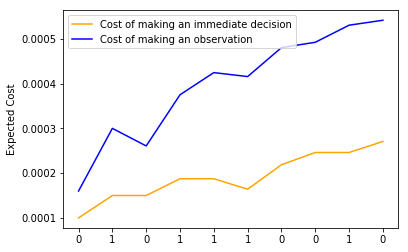

In [140]:
k = 0
n = 0
immediate_decision = []
observe = []
for f in flips:
    k = k + f
    n = n + 1
    immediate_decision.append(cost_immediate_decsion (n, k, loss_1_first_half, loss_2))
    observe.append(cost_observe_one_more(n, k, loss_1_first_half, loss_2))
#labels = [(10, k) for k in heads]
plt.plot(heads, immediate_decision, 'orange', label = 'Cost of making an immediate decision')
plt.plot(heads, observe, 'blue', label = 'Cost of making an observation') 
ax = plt.gca() # grab the current axis
ax.set_xticks(np.arange(1, 11)) # choose which x locations to have ticks
ax.set_xticklabels(flips) # set the labels to display at those ticks
plt.legend(loc='upper left')
plt.margins(0.05)
plt.ylabel('Expected Cost')
plt.show()